In [2]:
import sys
import os
sys.path.append(os.path.abspath("Pytorch/"))
sys.path.append(os.path.abspath("models/"))

In [3]:
from FBSNNs import *
from CallOptionsBasket import *

In [4]:
import numpy as np
import torch
import matplotlib.pyplot as plt
import time

M = 64  # number of trajectories (batch size)
N = 100  # number of time snapshots
D = 100 # number of dimensions
Mm = N ** (1/5)

layers = [D + 1] + 4 * [256] + [1]

Xi = np.array([1] * int(D))[None, :]
T = 1.0

"Available architectures"
mode = "NAIS-Net"  # FC, Resnet and NAIS-Net are available
activation = "Sine"  # Sine and ReLU are available
model = CallOptionsBasket(Xi, T, M, N, D, Mm, layers, mode, activation)

n_iter = 2 * 10**4
lr = 1e-3

In [5]:
model.load_model("models/100DCallOption.pth")

In [5]:
tot = time.time()
print(model.device)
graph = model.train(n_iter, lr)
print("total time:", time.time() - tot, "s")

cuda:0
It: 19900, Loss: 1.004e+02, Y0: 5.628, Time: 0.78, Learning Rate: 1.000e-04
It: 20000, Loss: 2.282e+01, Y0: 5.086, Time: 33.95, Learning Rate: 1.000e-04
It: 20100, Loss: 6.240e+01, Y0: 5.377, Time: 34.26, Learning Rate: 1.000e-04
It: 20200, Loss: 6.192e+01, Y0: 5.216, Time: 34.19, Learning Rate: 1.000e-04
It: 20300, Loss: 5.028e+01, Y0: 5.068, Time: 34.22, Learning Rate: 1.000e-04
It: 20400, Loss: 6.522e+01, Y0: 5.115, Time: 34.48, Learning Rate: 1.000e-04
It: 20500, Loss: 1.102e+01, Y0: 5.138, Time: 33.93, Learning Rate: 1.000e-04
It: 20600, Loss: 3.649e+01, Y0: 5.257, Time: 33.95, Learning Rate: 1.000e-04
It: 20700, Loss: 4.467e+01, Y0: 5.339, Time: 34.16, Learning Rate: 1.000e-04
It: 20800, Loss: 1.641e+01, Y0: 4.928, Time: 34.33, Learning Rate: 1.000e-04
It: 20900, Loss: 1.931e+02, Y0: 5.010, Time: 34.06, Learning Rate: 1.000e-04
It: 21000, Loss: 3.449e+01, Y0: 5.003, Time: 33.87, Learning Rate: 1.000e-04
It: 21100, Loss: 1.413e+01, Y0: 5.281, Time: 34.05, Learning Rate: 1.0

In [6]:
t_test, W_test = model.fetch_minibatch()
X_pred, Y_pred = model.predict(Xi, t_test, W_test)

if type(t_test).__module__ != 'numpy':
    t_test = t_test.cpu().numpy()
if type(X_pred).__module__ != 'numpy':
    X_pred = X_pred.cpu().detach().numpy()
if type(Y_pred).__module__ != 'numpy':
    Y_pred = Y_pred.cpu().detach().numpy()

for i in range(63):
    t_test_i, W_test_i = model.fetch_minibatch()
    X_pred_i, Y_pred_i = model.predict(Xi, t_test_i, W_test_i)
    if type(X_pred_i).__module__ != 'numpy':
        X_pred_i = X_pred_i.cpu().detach().numpy()
    if type(Y_pred_i).__module__ != 'numpy':
        Y_pred_i = Y_pred_i.cpu().detach().numpy()
    X_pred = np.concatenate((X_pred, X_pred_i), axis=0)
    Y_pred = np.concatenate((Y_pred, Y_pred_i), axis=0)


In [8]:
graph = model.iteration, model.training_loss

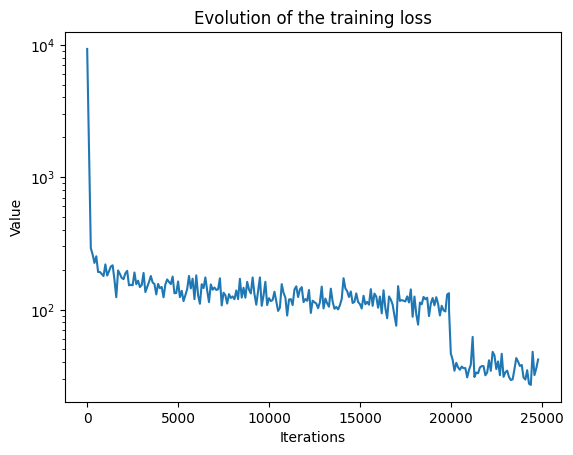

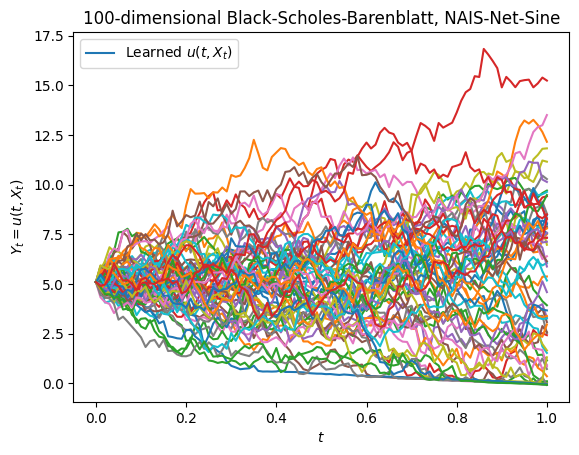

In [9]:
plt.figure()
plt.plot(graph[0], graph[1])
plt.xlabel('Iterations')
plt.ylabel('Value')
plt.yscale("log")
plt.title('Evolution of the training loss')
samples = 64

plt.figure()
plt.plot(t_test[0:1, :, 0].T, Y_pred[0:1, :, 0].T, label='Learned $u(t,X_t)$')


plt.plot(t_test[1:samples, :, 0].T, Y_pred[1:samples, :, 0].T)

plt.xlabel('$t$')
plt.ylabel('$Y_t = u(t,X_t)$')
plt.title(str(D) + '-dimensional Black-Scholes-Barenblatt, ' + model.mode + "-" + model.activation)
plt.legend()

plt.show()

In [10]:
Y_pred.shape

(4096, 101, 1)

In [11]:
Y_preds = Y_pred.reshape(4096, 101)

In [12]:
time_stamps = t_test[0].reshape(101,)
time_stamps

array([0.  , 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 ,
       0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21,
       0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32,
       0.33, 0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43,
       0.44, 0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54,
       0.55, 0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65,
       0.66, 0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76,
       0.77, 0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87,
       0.88, 0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98,
       0.99, 1.  ], dtype=float32)

In [13]:
Y_preds[:,0][:,None]

array([[5.089442],
       [5.089442],
       [5.089442],
       ...,
       [5.089442],
       [5.089442],
       [5.089442]], dtype=float32)

In [14]:
Y_preds

array([[5.089442 , 4.8026185, 5.4791827, ..., 7.9084854, 8.195215 ,
        8.048416 ],
       [5.089442 , 5.4539614, 5.810357 , ..., 4.9207115, 5.3554525,
        5.370694 ],
       [5.089442 , 5.1889915, 5.9290915, ..., 4.4575424, 4.1264424,
        3.922597 ],
       ...,
       [5.089442 , 5.013912 , 4.814383 , ..., 8.986838 , 8.906666 ,
        9.095176 ],
       [5.089442 , 5.532815 , 5.3135586, ..., 4.039064 , 4.0891976,
        4.3608685],
       [5.089442 , 5.3395615, 4.742341 , ..., 8.266569 , 8.424603 ,
        8.952565 ]], dtype=float32)

In [15]:
r = 0.05

In [17]:
epe = np.mean(np.exp(-r*time_stamps) * np.maximum(Y_preds,0),axis=0)    
epe

array([5.0896616, 5.098127 , 5.088592 , 5.092743 , 5.086921 , 5.0920477,
       5.09253  , 5.088001 , 5.075196 , 5.0567408, 5.050538 , 5.055686 ,
       5.0474415, 5.0546684, 5.0634947, 5.062733 , 5.0690665, 5.0676546,
       5.0801396, 5.075707 , 5.0768695, 5.0868526, 5.097214 , 5.0894527,
       5.092582 , 5.098145 , 5.091776 , 5.092778 , 5.094608 , 5.088091 ,
       5.1010375, 5.0957475, 5.0950065, 5.104845 , 5.1052094, 5.1137657,
       5.1134014, 5.1007767, 5.106328 , 5.111585 , 5.1081867, 5.1076117,
       5.111816 , 5.1140904, 5.1106324, 5.1107025, 5.1131787, 5.1122894,
       5.11168  , 5.1069393, 5.1005583, 5.1083283, 5.113689 , 5.118475 ,
       5.117293 , 5.1224833, 5.1242533, 5.1184487, 5.1132545, 5.114547 ,
       5.1118217, 5.1174617, 5.116333 , 5.1119566, 5.1110907, 5.1223907,
       5.122707 , 5.1137586, 5.1188455, 5.1149573, 5.1099954, 5.108047 ,
       5.116688 , 5.1283083, 5.127804 , 5.127521 , 5.12751  , 5.125953 ,
       5.128319 , 5.131289 , 5.1386013, 5.131982 , 

In [18]:
ene = np.mean(np.exp(-r*time_stamps) * np.minimum(Y_preds,0),axis=0)    
ene

array([ 0.0000000e+00,  0.0000000e+00,  0.0000000e+00,  0.0000000e+00,
        0.0000000e+00,  0.0000000e+00,  0.0000000e+00,  0.0000000e+00,
        0.0000000e+00,  0.0000000e+00,  0.0000000e+00,  0.0000000e+00,
        0.0000000e+00,  0.0000000e+00,  0.0000000e+00,  0.0000000e+00,
        0.0000000e+00,  0.0000000e+00,  0.0000000e+00,  0.0000000e+00,
        0.0000000e+00,  0.0000000e+00,  0.0000000e+00,  0.0000000e+00,
        0.0000000e+00,  0.0000000e+00,  0.0000000e+00,  0.0000000e+00,
        0.0000000e+00,  0.0000000e+00,  0.0000000e+00,  0.0000000e+00,
        0.0000000e+00,  0.0000000e+00,  0.0000000e+00,  0.0000000e+00,
        0.0000000e+00,  0.0000000e+00,  0.0000000e+00,  0.0000000e+00,
        0.0000000e+00,  0.0000000e+00,  0.0000000e+00,  0.0000000e+00,
        0.0000000e+00,  0.0000000e+00,  0.0000000e+00,  0.0000000e+00,
        0.0000000e+00,  0.0000000e+00,  0.0000000e+00,  0.0000000e+00,
        0.0000000e+00,  0.0000000e+00,  0.0000000e+00,  0.0000000e+00,
      

In [19]:
from scipy.stats import multivariate_normal as normal
dw_sample = normal.rvs(size=[40000, D, N]) * np.sqrt(T/N)
x_sample = np.zeros([40000, D, N + 1]) 
x_sample[:, :, 0] = np.ones([40000, D]) * 1
factor = np.exp((0.05-(0.4**2)/2)*(T/N))
for i in range(N):   
    x_sample[:, :, i + 1] = (factor * np.exp(0.4 * dw_sample[:, :, i])) * x_sample[:, :, i]

In [20]:
portfolio = np.sum(x_sample, axis=1, keepdims=True)
payoff = np.maximum(portfolio - 100 * 1, 0)
average = np.mean(payoff, axis=0, keepdims=True)
mc_price = np.exp(-0.05 * 1) * average[:, :, 100]

In [21]:
mc_price

array([[5.10862282]])

In [22]:
epe_exact = np.array([mc_price[0][0] for _ in time_stamps])
ene_exact = np.array([0.0 for _ in time_stamps])

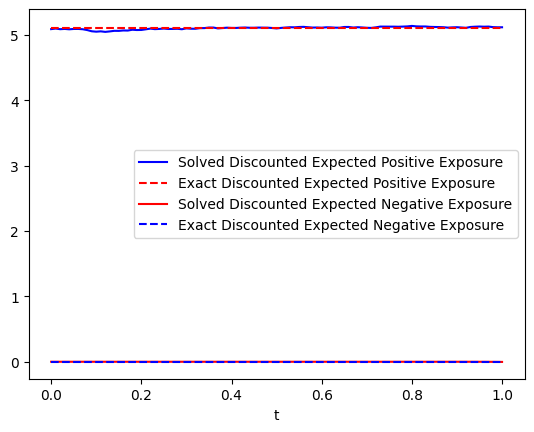

In [23]:
fig = plt.figure()
plt.plot(time_stamps,np.transpose(epe),'b',label='Solved Discounted Expected Positive Exposure' )
plt.plot(time_stamps,epe_exact,'r--',label='Exact Discounted Expected Positive Exposure')
plt.plot(time_stamps,np.transpose(ene),'r',label='Solved Discounted Expected Negative Exposure')
plt.plot(time_stamps,ene_exact,'b--',label='Exact Discounted Expected Negative Exposure')

plt.xlabel('t')
plt.legend()

plt.show()

In [24]:
np.mean((epe_exact - epe)**2)

0.0004177924932616144

In [25]:
var = np.abs(np.quantile((Y_preds - Y_preds[:,0][:,None]), 0.05, axis=0))

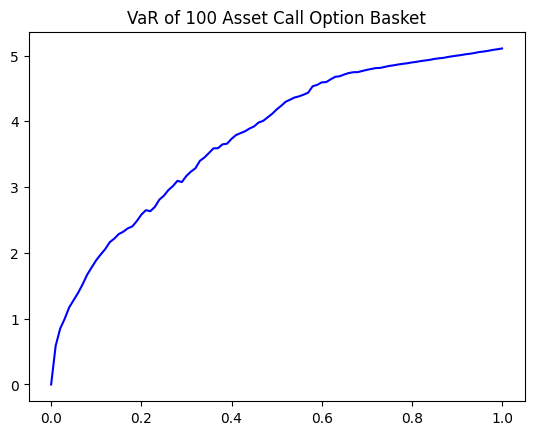

In [26]:
plt.title('VaR of 100 Asset Call Option Basket')
plt.plot(time_stamps,var,'b',label='VaR')
plt.show()

In [7]:
rate = 0.05
R_C = 0.3
R_B = 0.4
collateral = 0
intensityC = 0.1
intensityB = 0.01

In [27]:
Y_preds

array([[5.089442 , 4.8026185, 5.4791827, ..., 7.9084854, 8.195215 ,
        8.048416 ],
       [5.089442 , 5.4539614, 5.810357 , ..., 4.9207115, 5.3554525,
        5.370694 ],
       [5.089442 , 5.1889915, 5.9290915, ..., 4.4575424, 4.1264424,
        3.922597 ],
       ...,
       [5.089442 , 5.013912 , 4.814383 , ..., 8.986838 , 8.906666 ,
        9.095176 ],
       [5.089442 , 5.532815 , 5.3135586, ..., 4.039064 , 4.0891976,
        4.3608685],
       [5.089442 , 5.3395615, 4.742341 , ..., 8.266569 , 8.424603 ,
        8.952565 ]], dtype=float32)

In [33]:
discount = np.exp(-(rate+intensityB+intensityC)*np.linspace(0,T,N+1))

In [35]:
phi_cva = (1-R_C)*discount*np.maximum(-Y_preds,0)*intensityC

In [37]:
phi_dva = (1-R_B)*discount*np.maximum(Y_preds,0)*intensityB

In [43]:
dva = np.sum(phi_dva.reshape(4096,1,101), axis=-1) - (phi_dva.reshape(4096,1,101)[:,:,-1] + phi_dva.reshape(4096,1,101)[:,:,0])/2

In [48]:
dva

array([[3.45719197],
       [2.25685691],
       [2.3418681 ],
       ...,
       [3.55262686],
       [1.85274229],
       [3.42873394]])

In [50]:
dva[:,0] * T/N

array([0.03457192, 0.02256857, 0.02341868, ..., 0.03552627, 0.01852742,
       0.03428734])

In [51]:
np.mean(dva[:,0] * T/N)

0.029006422420019516

In [55]:
np.sum(epe_exact * intensityB * discount) * (1-R_B) * T/N

0.028609173699916526

In [26]:
model.save_model("models/100DCallOption.pth")